# Search molecules from database


In [1]:
import Pkg
Pkg.activate("..")
using GraphMol

## Download test database

- Download public domain drug dataset provided by [DrugBank](https://drugbank.ca).
- **(Note)** the data size is a bit large (25.2 MB).
- `Graphmol.fetchfile` is almost same as the Julia built-in function `download(url, destination)` but it checks if the file already exists. Save the data to your workspace directory and then unzip it.

In [2]:
dest = joinpath(resource_dir, "zippedstructures.zip")
fetchfile("https://www.drugbank.ca/releases/5-1-1/downloads/all-open-structures", dest)

file: zippedstructures.zip already exists


## Generate molecules

- `sdfilereader` loads SDFile text data from the file, and generates array of molecule objects.
- In this tutorial, the first 2000 molecules were extracted from the file for the test.

In [5]:
path =  joinpath(dirname(@__FILE__), "..", "_resources", "open structures.sdf")
mols = collect(Iterators.take(sdfilereader(open(path)), 2000))
println("OK")

OK


## Search function

- `parse` SMARTS strings into query molecule objects.
- `SMARTS` and `ConnectedSMARTS` can be the type parameter of `parse`. `SMARTS` can parse most of general SMARTS strings, whereas `ConnectedSMARTS` can parse only connected SMARTS (without dot `.` syntax) but works faster.
- `is_querymatch(mol, query)` compares a molecule-query pair and returns true if they match.

In [6]:
function substrsearch(smarts)
    matched = []
    query = parse(ConnectedSMARTS, smarts)
    for (i, m) in enumerate(mols)
        if is_querymatch(m, query)
            push!(matched, m)
            print("@")
        else
             print("+")
        end
        if i % 50 == 0
            println(i)
        end
    end
    println()
    return matched
end

substrsearch (generic function with 1 method)

## Do substructure search


In [8]:
# Peroxide -O-O-
results1 = substrsearch("[OX2][OX2]")

println("$(length(results1)) records matched")

++++++++++++++++++++++++++++++++++++++++++++++++++50
++++++++++++++++++++++++++++++++++++++++++++++++++100
++++++++++++++++++++++++++++++++++++++++++++++++++150
++++++++++++++++++++++++++++++++++++++++++++++++++200
++++++++++++++++++++++++++++++++++++++++++++++++++250
++++++++++++++++++++++++++++++++++++++++++++++++++300
++++++++++++++++++++++++++++++++++++++++++++++++++350
++++++++++++++++++++++++++++++++++++++++++++++++++400
++++++++++++++++++++++++++++++++++++++++++++++++++450
++++++++++++++++++++++++++++++++++++++++++++++++++500
++++++++++++++++++++++++++++++++++++++++++++++++++550
++++++++++++++++++++++++++++++++++++++++++++++++++600
++++++++++++++++++++++++++++++++++++++++++++++++++650
++++++++++++++++++++++++++++++++++++++++++++++++++700
++++++++++++++++++++++++++++++++++++++++++++++++++750
++++++++++++++++++++++++++++++++++++++++++++++++++800
++++++++++++++++++++++++++++++++++++++++++++++++++850
++++++++++++++++++++++++++++++++++++++++++++++++++900
+++++++++++++++++++++++++++++

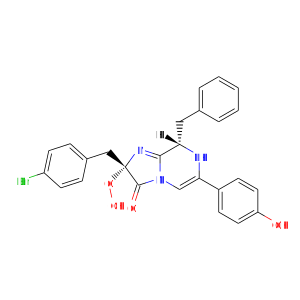

In [10]:
# Display one of the hit compounds
mol_svg = drawsvg!(results1[1], 300, 300)
display("image/svg+xml",  mol_svg)

In [12]:
# Cephem core fused rings
results2 = substrsearch("C1C(=O)N2C=CCSC12")

println("$(length(results2)) records matched")

++++++++++++++++++++++++++++++++++++++++++++++++++50
++++++++++++++++++++++++++++++++++++++++++++++++++100
+++++++++++++++++++++++@++++++++++++++++++++++++++150
+++++++++++@++++++@+++++++++++++++++++++++++++++++200
++++++++++++++++++++++++++++++++++++++++++++++++++250
++++++++++++++++++++++++++++++++++++++++++++++++++300
++++++++++++++++++++@+++++++@+++++++++++++++++@+++350
+++++++++++++++++++++++++++++++++@++++++++++++++++400
++++++++++++++++++++++@+++++++++++++++++++++++++++450
++++@+++++++++++++++++++++++++++++++++++++++++++++500
++++++++++++++++++++++++++++++++++++++++++++++++++550
+++++++@+++++++++++++++++@++++++++++++++++++++++++600
++++++++++++++++++++++++++++++++++++++++++++++++++650
++++++++++++++++++++++++++++++++++++++++++++++++++700
++++++++++++++++@+++++++++++++++++++++++++++++++++750
++++++++++++++++++++++++++++++++++++++++++++++++++800
++++@+++++++++++++++++++++++++++++++++++++++++++++850
++++++++++++++++++++++++++++++++++++++++++++++++++900
+++++++++++++++++++++++++++++

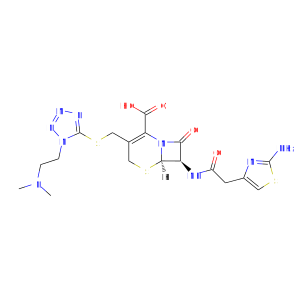

In [13]:
# Display one of the hit compounds
mol_svg = drawsvg!(results2[1], 300, 300)
display("image/svg+xml",  mol_svg)